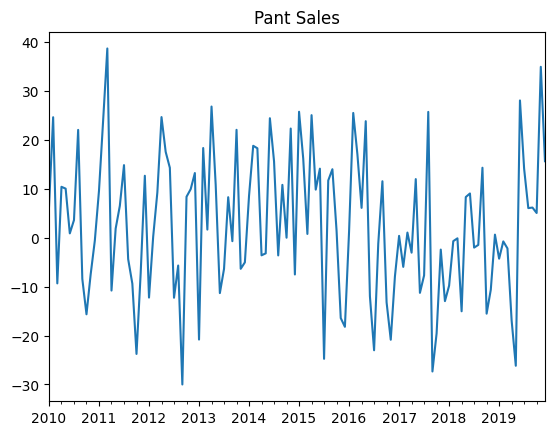

In [1]:

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
df = pd.read_csv("time_series_dataset.csv", index_col=0)
df.index = pd.to_datetime(df.index)
y = df["Pant"]
y.name = "n_pant"
y.plot(title="Pant Sales");
# create the DF
seasonal_df = y.to_frame()




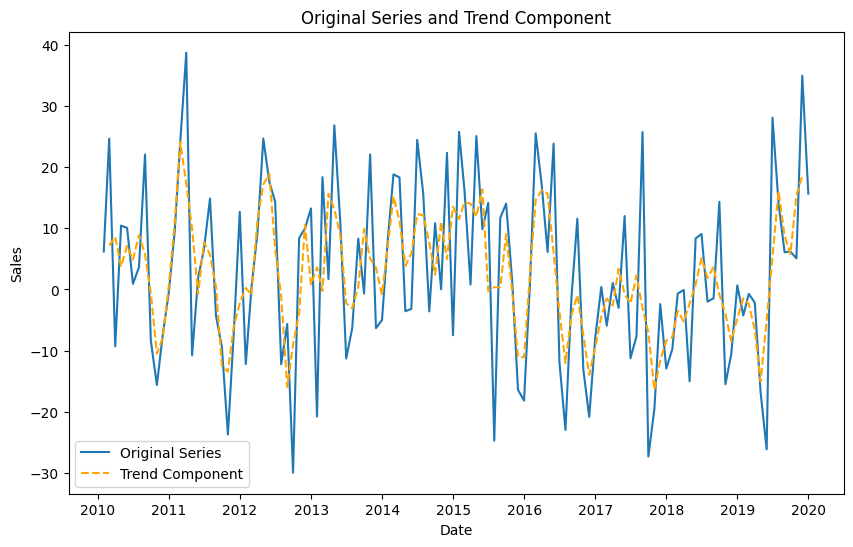

In [2]:
# calculate the trend component
seasonal_df["trend"] = seasonal_df["n_pant"].rolling(window=3, center=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(seasonal_df.index, seasonal_df["n_pant"], label='Original Series')
plt.plot(seasonal_df.index, seasonal_df["trend"], label='Trend Component', linestyle='--', color='orange')
plt.title('Original Series and Trend Component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

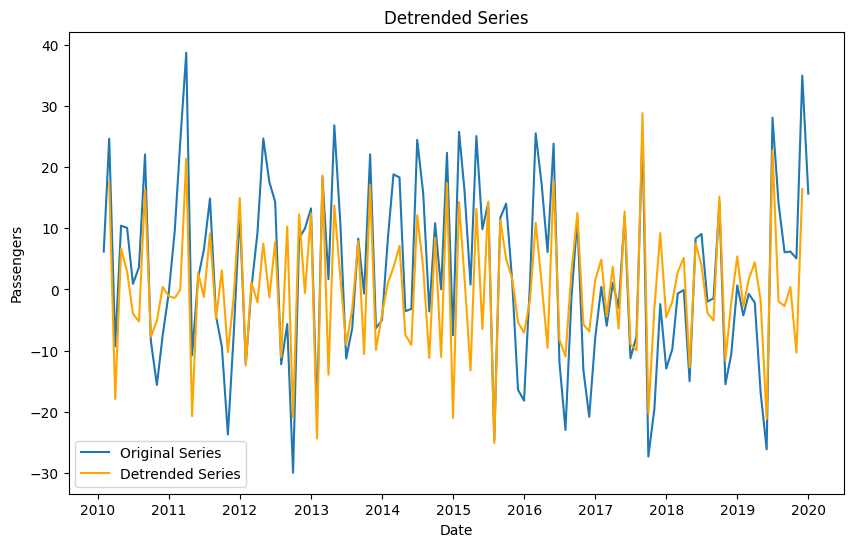

In [3]:
# detrend the series
seasonal_df["detrended"] = seasonal_df["n_pant"] - seasonal_df["trend"]

plt.figure(figsize=(10, 6))

plt.plot(seasonal_df.index, seasonal_df["n_pant"], label='Original Series')
plt.plot(seasonal_df.index, seasonal_df["detrended"], label='Detrended Series', color='orange')
plt.title('Detrended Series')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

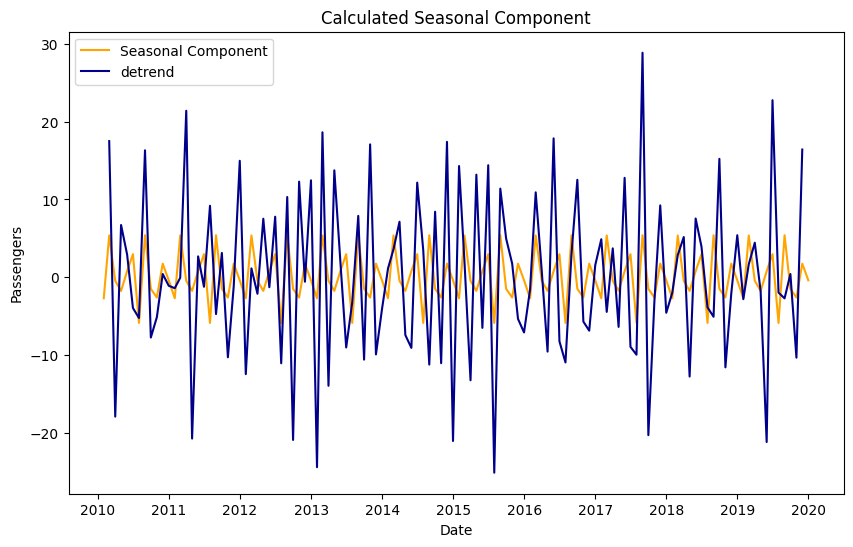

In [4]:
# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

plt.figure(figsize=(10, 6))
plt.plot(seasonal_df.index, seasonal_df["seasonality"], label='Seasonal Component', color='orange')
plt.plot(seasonal_df.index, seasonal_df["detrended"], label='detrend', color='darkblue')
plt.title('Calculated Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()



In [5]:
# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]



In [6]:
print(seasonal_df['detrended'].iloc[2::12])
print(seasonal_df['detrended'].iloc[2::12].mean())



2010-03-31   -17.914198
2011-03-31    21.391882
2012-03-31    -2.125641
2013-03-31   -13.951369
2014-03-31     7.129348
2015-03-31   -13.240262
2016-03-31     0.821320
2017-03-31     3.706399
2018-03-31     5.165100
2019-03-31     4.433846
Name: detrended, dtype: float64
-0.45835748170435764


In [7]:

print(seasonal_df.head(20))

               n_pant      trend  detrended  month  seasonality      resid
2010-01-31   6.198828        NaN        NaN      1    -2.706343        NaN
2010-02-28  24.673660   7.185889  17.487771      2     5.365394  12.122378
2010-03-31  -9.314822   8.599376 -17.914198      3    -0.458357 -17.455841
2010-04-30  10.439291   3.730144   6.709147      4    -1.755943   8.465090
2010-05-31  10.065962   7.139187   2.926775      5     0.774216   2.152559
2010-06-30   0.912308   4.870294  -3.957986      6     2.960825  -6.918811
2010-07-31   3.632611   8.875256  -5.242645      7    -5.875829   0.633185
2010-08-31  22.080849   5.770941  16.309909      8     5.397273  10.912636
2010-09-30  -8.400639  -0.652644  -7.747994      9    -1.490198  -6.257797
2010-10-31 -15.638144 -10.508362  -5.129782     10    -2.610116  -2.519666
2010-11-30  -7.486304  -7.899745   0.413442     11     1.743856  -1.330414
2010-12-31  -0.574788   0.525491  -1.100279     12    -0.395328  -0.704951
2011-01-31   9.637565  11

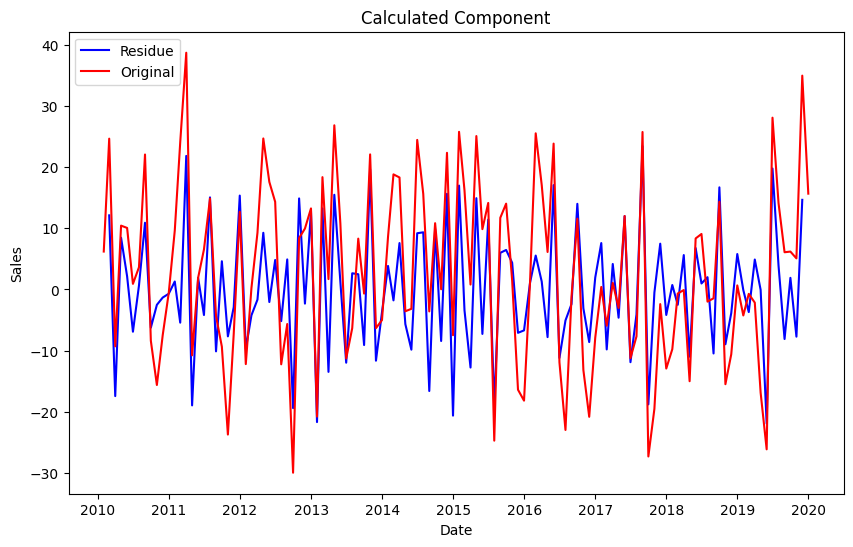

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(seasonal_df.index, seasonal_df["resid"], label='Residue', color='blue')
plt.plot(seasonal_df.index, seasonal_df["n_pant"], label='Original', color='red')
plt.title('Calculated Component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()